In [ ]:
# example of api_key.py in same local directory as this python file

# Your API key
chatgpt_api_key = "sk-proj-PQmKwy2cy4B4CaDpevUTuT3BlbkhaQL0CdcKOu8NHcYqKp9L8"

In [1]:
#https://tinyurl.com/Physics-Tools
from openai import OpenAI
from api_key import chatgpt_api_key
from sympy import *
from sympy.abc import x,y,t,theta,omega
decis = 1 #specifies decimal places in outputs for n in N(stuff,n)
funcv = Function('v')(t)
i = symbols('i');j = symbols('j');v0x = Symbol('v_0x');v0y = Symbol('v_0y');vvv = Symbol('v\u20D7')
a_c = Symbol('a_c'); a_T = Symbol('a_T'); a = Symbol('||a\u20D7||'); aa = Symbol('a\u20D7')
r,T,t0, t, x0, v0, v, v_avg, a =  Symbol('r'),Symbol('T'),Symbol('t_0'),Symbol('t'), Symbol('x_0'), Symbol('v_0'), Symbol('v'), Symbol(r'\bar{v}'), Symbol('a')

In [5]:
# quick calculator
solve(Eq(x,2*t+t**2),t)
245/9

27.22222222222222

# Feature Extractor

In [24]:
# Takes word problem as input and outputs the givens/knowns/variables
word_problem = input("Copy/paste the word problem here: ")
prompt = f"Focus on minimizing the words used, users only need to know what the variables are\
In your response, format the output in a way that is prepared to be used as \
the input for a function solver. For example, use variables like r for radius, \
t for time, v = velocity, a = acceleration, v0 = initial velocity, etc. Now, extract the \
givens/knowns/variables from the \
following word problem: {word_problem}. Do not forget to include gravity if needed. Specify v0 as v0y or v0x."
print("...")
print(".......")
print(".............")
client = OpenAI(
    api_key=chatgpt_api_key,
)

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a program that assists a professor."},
    {"role": "user", "content": prompt}
  ]
)
print(completion.choices[0].message.content)

Copy/paste the word problem here: A bullet is shot horizontally from shoulder height (1.5 m) with an initial speed 200 m/s.
...
.......
.............
v0x = 200 m/s, v0y = 0 m/s, y0 = 1.5 m, ax = 0 m/s^2, ay = -9.81 m/s^2


In [21]:
# Takes word problem as input and outputs suggested equations to use
word_problem = input("Copy/paste the word problem here: ")
prompt = f"Suggest an equation from this list or one that is not listed that can be used\
to solve this word problem. Equations might be Eq(funcv, a*(t-t0)+v0), \
Eq(v_avg, (v0 + v) / 2),Eq(x, x0 + v * t),Eq(v, v0 + a * t), \
Eq(x, x0 + v0 * t + (1 / 2) * a * t ** 2),Eq(v ** 2, v0 ** 2 + 2 * a * (x - x0)), \
Eq(v0,sqrt((a*(x-x0))/sin(2*rad(theta)))),Eq(T,(2*pi*r)/v),Eq(omega, (2*pi)/T) \
Eq(funcr,r*cos(omega*t)*i+r*sin(omega*t)*j),..use the following word problem: {word_problem}\
swap variables x for y variables when needed like using y0 instead of x0 given the context.\
Double check the gravity is correctly a positive or negative value.\
Ensure the initial speed v0 is framed correctly. v0x and v0y should be specified"
print("...")
print(".......")
print(".............")
client = OpenAI(
    api_key=chatgpt_api_key,
)

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a program that assists a professor."},
    {"role": "user", "content": prompt}
  ]
)
print(completion.choices[0].message.content)

Copy/paste the word problem here: A bullet is shot horizontally from shoulder height (1.5 m) with an initial speed 200 m/s. (a) How much time elapses before the bullet hits the ground? (b) How far does the bullet travel horizontally?
...
.......
.............
To solve this word problem, we can use the equations of motion for projectile motion. 

Given:
Initial position in the vertical direction, y0 = 1.5 m
Initial speed in the horizontal direction, v0x = 200 m/s
Acceleration due to gravity, a = -9.81 m/s^2

(a) To find the time before the bullet hits the ground:
We can use the equation: Eq(y, y0 + v0yt + (1/2)at^2)
Where:
y = 0 (when the bullet hits the ground)
y0 = 1.5 m
v0y = 0 (since the bullet is shot horizontally)
a = -9.81 m/s^2

Substitute the values into the equation to solve for t:
0 = 1.5 + 0 + (1/2)(-9.81)t^2
-1.5 = -4.905t^2
t^2 = 1.5 / 4.905
t ≈ sqrt(0.306) ≈ 0.553 s

Therefore, the time elapsed before the bullet hits the ground is approximately 0.553 seconds.

(b) To find

# Motion in Two and Three Dimensions


In [2]:
#calc components of initial velocity vector given its angle and magnitude
magnitude=5
angle_degrees =30
# Convert degrees to radians
angle_radians = rad(angle_degrees)
# Calculate cosine of the angle in degrees
display(Eq(v0x,N(magnitude*cos(angle_radians),4)))
display(Eq(v0y,N(magnitude*sin(angle_radians),4)))
display(Eq(vvv,N(magnitude*cos(angle_radians),4)*i+N(magnitude*sin(angle_radians),4)*j))

Eq(v_0x, 4.33)

Eq(v_0y, 2.5)

Eq(v⃗, 4.33*i + 2.5*j)

In [41]:
#NON UNIFORM CIRCULAR MOTION
tt = input("Enter the time in seconds: ") 
rr = input("Enter the radius in meters: ") 
function = t**3-t**2+5*t   #original velocity function must be manually entered
funcv = Function('v')(t)
eq11 = Eq(funcv,function,evalute=False)
eq12 = N(Eq(funcv,function,evalute=False).subs(t,tt),3)
eq13 = N(Eq(a_c,eq11.rhs.subs(t,tt)**2/r).subs(r,rr),3)
eq133 = Eq(a_c,Eq(eq11.rhs**2/r,eq13,evaluate=False))
eq14 = Eq(a_T,Derivative(function)).subs(t,tt)
eq15 = N(Eq(eq14,eq14.doit()),3)
a_c = eq13.rhs; a_T = eq15.rhs.rhs
eq16 = Eq(a,N(sqrt(a_c**2+a_T**2),3))

#TOA Calculate the direction of the force using the inverse tangent function
opposite_y = a_c
adjacent_x = a_T
direction = atan2(opposite_y, adjacent_x).evalf()
direction_degrees = N(deg(direction),3)
if direction_degrees < 0:
    direction_degrees += 360
    
display(eq11,eq12,eq133,eq15,eq16)
print(f"The angle is {direction_degrees} degrees")

#calc components of the final acceleration vector given its angle and magnitude
magnitude=eq16.rhs
angle_degrees =direction_degrees

# Convert degrees to radians
angle_radians = rad(angle_degrees)
# Calculate cosine of the angle in degrees
a0x = Symbol('a_0x');a0y = Symbol('a_0y')
a0x = Eq(a0x,N(magnitude*cos(angle_radians),4)).rhs
a0y = Eq(a0y,N(magnitude*sin(angle_radians),4)).rhs
display(Eq(aa,a0x*i+a0y*j))

Enter the time in seconds: 1
Enter the radius in meters: 4


Eq(v(t), t**3 - t**2 + 5*t)

Eq(v(1), 5.0)

Eq(a_c, Eq((t**3 - t**2 + 5*t)**2/r, Eq(a_c, 6.25)))

Eq(Eq(a_T, Subs(Derivative(t**3 - t**2 + 5*t, t), t, 1)), Eq(a_T, 6.0))

Eq(||a⃗||, 8.66)

The angle is 46.2 degrees


Eq(a⃗, 6.001*i + 6.25*j)

In [27]:
funcr = Function('r\u20D7')(t)
eq0 = Eq(funcv, a*(t-t0)+v0)
eq1 = Eq(v_avg, (v0 + v) / 2)       #NOTE: avg acceleration is (v-v0)/(t-t0)
eq2 = Eq(x, x0 + v* t)
eq3 = Eq(v, v0 + a * t)
eq4 = Eq(x, x0 + v0 * t + (1 / 2) * a * t ** 2)
eq5 = Eq(v ** 2, v0 ** 2 + 2 * a * (x - x0))
eq6 = Eq(v0,sqrt((a*(x-x0))/sin(2*rad(theta))))
eq7 = Eq(y,x*(tan(rad(theta))-x*(a/(2*(v0*cos(rad(theta)))**2))))
eq8 = Eq(T,(2*pi*r)/v)
eq9 = Eq(omega, (2*pi)/T)
eq10 = Eq(funcr,r*cos(omega*t)*i+r*sin(omega*t)*j)

print("f0) Equation of Motion");display(eq0)
print("f1) Determines Average Velocity");display(eq1)
print("f2) Determines Displacement");display(eq2)
print("f3) Equation of Motion");display(eq3)
print("f4) Determines Displacement");display(eq4)
print("f5) Final Velocity Squared");display(eq5)
print("f6) Calculates initial velocity");display(eq6)
print("f7) Calculates Trajectory");display(eq7)
print("f8) Period for Uniform Circular Motion");display(eq8)
print("f9) Angular Frequency for Uniform Circular Motion");display(eq9)
print("f10) The position of the particle for Uniform Circular Motion");display(eq10)
def solve_eq(eq, subs_dict):
    return solve(eq.subs(subs_dict))
def f0(ffuncv,aa,tt,t0t0,v0v0): 
    return solve_eq(eq0, {funcv: ffuncv, a: aa, t: tt,t0: t0t0, v0: v0v0})
def f1(vv_avg,vv,v0v0): 
    return solve_eq(eq1, {v_avg: vv_avg, v: vv, v0: v0v0})
def f2(xx,vv,tt,x0x0): 
    return solve_eq(eq2, {x: xx, v: vv, t: tt, x0: x0x0})
def f3(vv,aa,tt,v0v0): 
    return solve_eq(eq3, {v: vv, a: aa, t: tt, v0: v0v0})
def f4(xx, aa, tt, v0v0, x0x0):
    return solve_eq(eq4, {x: xx, a: aa, t: tt, v0: v0v0, x0: x0x0})
def f5(vv, aa, xx, x0x0,v0v0):
    return solve_eq(eq5, {v: vv, a: aa, x: xx, x0: x0x0, v0: v0v0})
def f6(v0v0, aa, xx, x0x0,thetatheta):
    return solve_eq(eq6, {v0: v0v0, a: aa, x: xx, x0: x0x0, theta: thetatheta})
def f7(yy, xx,aa,v0v0,thetatheta):
    return solve_eq(eq7, {y: yy, x: xx,a: aa, v0: v0v0, theta: thetatheta})
def f8(TT, rr, vv):
    return solve_eq(eq8, {T: TT, r: rr,v: vv})
def f9(omegaomega,TT):
    return solve_eq(eq9, {omega: omegaomega, T: TT})
def f10(ffuncr,rr,omegaomega,tt):
    return solve_eq(eq10, {funcr:ffuncr, r:rr,omega: omegaomega, t: tt})
# Dictionary to map function numbers to their corresponding functions
functions = {
    0: f0,
    1: f1,
    2: f2,
    3: f3,
    4: f4,
    5: f5,
    6: f6,
    7: f7,
    8: f8,
    9: f9,
    10:f10,

}
selected_function = int(input("Enter the number of the function: "))

# Prompt user to enter variables
if selected_function in functions:
    func = functions[selected_function]
    if selected_function == 0:
        ffuncv = input("Enter the final velocity: ")
        aa = input("Enter the acceleration: ")
        tt = input("Enter the final time: ")
        t0t0=input("Enter the initial time: ")
        v0v0 = input("Enter the initial velocity: ")
        if v0v0.isnumeric() or (v0v0[0] == '-' and v0v0[1:].isnumeric()):
            v0v0 = float(v0v0)
        result = func(ffuncv, aa, tt,t0t0, v0v0)
    elif selected_function == 1:
        vv_avg = input("Enter the average velocity: ")
        if vv_avg.isnumeric() or (vv_avg[0] == '-' and vv_avg[1:].isnumeric()):
            vv_avg = float(vv_avg)
        vv = input("Enter the final velocity: ")
        v0v0 = input("Enter the initial velocity: ")
        if v0v0.isnumeric() or (v0v0[0] == '-' and v0v0[1:].isnumeric()):
            v0v0 = float(v0v0)
        result = func(vv_avg, vv, v0v0)
    elif selected_function == 2:
        xx = input("Enter the displacement: ")
        if xx.isnumeric() or (xx[0] == '-' and xx[1:].isnumeric()):
            xx = float(xx)
        tt = input("Enter the time: ")
        vv = input("Enter the velocity: ")
        if tt.isnumeric() or (tt[0] == '-' and tt[1:].isnumeric()):
            tt = float(tt)
        x0x0 = input("Enter the initial position: ")
        if x0x0.isnumeric() or (x0x0[0] == '-' and x0x0[1:].isnumeric()):
            x0x0 = float(x0x0)
        result = func(xx, vv, tt, x0x0)
    elif selected_function == 3:
        vv = input("Enter the final velocity: ")
        aa = input("Enter the acceleration: ")
        tt = input("Enter the time: ")
        v0v0 = input("Enter the initial velocity: ")
        if v0v0.isnumeric() or (v0v0[0] == '-' and v0v0[1:].isnumeric()):
            v0v0 = float(v0v0)
        result = func(vv, aa, tt, v0v0)
    elif selected_function == 4:
        xx = input("Enter the final position: ")
        aa = input("Enter the acceleration: ")
        tt = input("Enter the time: ")
        v0v0 = input("Enter the initial velocity: ")
        if v0v0.isnumeric() or (v0v0[0] == '-' and v0v0[1:].isnumeric()):
            v0v0 = float(v0v0)
        x0x0 = input("Enter the initial position: ")
        if x0x0.isnumeric() or (x0x0[0] == '-' and x0x0[1:].isnumeric()):
            x0x0 = float(x0x0)
        result = func(xx, aa, tt, v0v0, x0x0)
    elif selected_function == 5: 
        vv = input("Enter the final velocity: ")
        aa = input("Enter the acceleration: ")
        xx = input("Enter the final position: ")
        x0x0 = input("Enter the initial position: ")
        v0v0 = input("Enter the initial velocity: ")
        if v0v0.isnumeric() or (v0v0[0] == '-' and v0v0[1:].isnumeric()):
            v0v0 = float(v0v0)
        result = func(vv, aa, xx, x0x0, v0v0)
    elif selected_function == 6: 
        v0v0 = input("Enter the initial velocity: ")
        aa = input("Enter the acceleration: ")
        xx = input("Enter the end distance: ")
        x0x0 = input("Enter the initial distance: ")
        thetatheta = input("Enter the initial angle in degrees: ")
        if v0v0.isnumeric() or (v0v0[0] == '-' and v0v0[1:].isnumeric()):
            v0v0 = float(v0v0)
        result = func(v0v0, aa, xx, x0x0, thetatheta)
    elif selected_function == 7: 
        yy = input("Enter the initial height: ")
        xx = input("Enter the end distance: ")
        aa = input("Enter the acceleration: ")
        v0v0 = input("Enter the initial velocity: ")
        thetatheta = input("Enter the initial angle in degrees: ")
        if v0v0.isnumeric() or (v0v0[0] == '-' and v0v0[1:].isnumeric()):
            v0v0 = float(v0v0)
        result = func(yy, xx, aa, v0v0, thetatheta)
    elif selected_function == 8: 
        TT = input("Enter the period of motion: ")
        rr = input("Enter the radius: ")
        vv = input("Enter the speed or velocity: ")
        result = func(TT, rr, vv)        
    elif selected_function == 9: 
        omegaomega = input("Enter the angular frequency in radians (type 'omega' if unknown): ")
        TT = input("Enter the period of motion: ")
        result = func(omegaomega, TT)  
    elif selected_function == 10: 
        ffuncr = input("Enter the particle's position (type 'funcr' if unknown): ")
        rr = input("Enter the radius in radians: ")
        omegaomega = input("Enter the angular frequency in radians (type 'omega' if unknown): ")
        tt = input("Enter the time: ")
        result = func(ffuncr,rr,omegaomega,tt)          
        
    print("The result is:", result)
else:
    print("Invalid function number. Please choose a number between 0 and 10.")

f0) Equation of Motion


Eq(v(t), a*(t - t_0) + v_0)

f1) Determines Average Velocity


Eq(\bar{v}, v/2 + v_0/2)

f2) Determines Displacement


Eq(x, t*v + x_0)

f3) Equation of Motion


Eq(v, a*t + v_0)

f4) Determines Displacement


Eq(x, 0.5*a*t**2 + t*v_0 + x_0)

f5) Final Velocity Squared


Eq(v**2, 2*a*(x - x_0) + v_0**2)

f6) Calculates initial velocity


Eq(v_0, sqrt(a*(x - x_0)/sin(pi*theta/90)))

f7) Calculates Trajectory


Eq(y, x*(-a*x/(2*v_0**2*cos(pi*theta/180)**2) + tan(pi*theta/180)))

f8) Period for Uniform Circular Motion


Eq(T, 2*pi*r/v)

f9) Angular Frequency for Uniform Circular Motion


Eq(omega, 2*pi/T)

f10) The position of the particle for Uniform Circular Motion


Eq(r⃗(t), i*r*cos(omega*t) + j*r*sin(omega*t))

Enter the number of the function: 5
Enter the final velocity: v
Enter the acceleration: -9.8
Enter the final position: 0
Enter the initial position: 1
Enter the initial velocity: 0
The result is: [-4.42718872423573, 4.42718872423573]


In [8]:
#Pythagorean Theoreom to find the MAGNITUDE of a velocity vector
# magnitude given A and B for A^2+B^2=C^2
A = 6
B =-21
C =10 #if three dimensions
two = N(sqrt(A**2+B**2),3)
three =N(sqrt(A**2+B**2+C**2),3)
print("pythagorean of two sides:",two)
print("pythagorean of three sides:",three)

pythagorean of two sides: 21.8
pythagorean of three sides: 24.0


In [6]:
# TOA Calculate the ANGLE of final velocity vector using the inverse tangent function

# Given components of the vector V as v_x and v_y
opposite_y = -15.9 
adjacent_x = 21

# Calculate the angle using atan2
direction = atan2(opposite_y, adjacent_x)

# Convert the direction or angle to degrees
direction_degrees = N(deg(direction),3)

# Adjust the result to be in the range [0, 360)
if direction_degrees < 0:
    direction_degrees += 360
print(f"The angle is {direction_degrees} degrees")
print(f"The angle is {360-direction_degrees} degrees below the x-axis")

The angle is 323 degrees
The angle is 37.1 degrees below the x-axis


# Motion Along a Straight Line

In [7]:
#impromptu calculator
eqn = Eq(0,t**2+10*t-200)
eqn
solve(eqn)
q = 120**2
q = Symbol('q')
N(800000*sqrt(94),3)
2501/50

50.02

In [8]:
# Converts km/hr to m/s
def km_per_hr_to_m_per_s(speed_km_hr):
    # 1 km/hr = 1000 m / 3600 s
    conversion_factor = Rational(1000, 3600)
    return speed_km_hr * conversion_factor
speed_km_hr = 80  # Example speed in km/hr
speed_m_per_s = km_per_hr_to_m_per_s(speed_km_hr)
print("Speed in m/s:", N(speed_m_per_s,3))

Speed in m/s: 22.2


# Vectors

In [9]:
#Pythagorean Theoreom
#magnitude given A and B for A^2+B^2=C^2
A = 5
B =4
C =24
two = N(sqrt(A**2+B**2),3)
three =N(sqrt(A**2+B**2+C**2),3)
print("pythagorean of two sides:",two)
print("pythagorean of three sides:",three)

pythagorean of two sides: 6.40
pythagorean of three sides: 24.8


In [10]:
#on the spot basic calculator
s = (109/33)
s*290

957.8787878787879

In [11]:
def degrees_to_unit_vector(degrees):
    radians = rad(degrees)
    x = cos(radians)
    y = sin(radians)
    return (N(x,2), N(y,2))

# Test the function
degrees = 30  # Example angle in degrees
unit_vector = degrees_to_unit_vector(degrees)
print(f"The unit vector for {degrees} degrees is:")
display(Matrix([unit_vector[0],unit_vector[1]]))

The unit vector for 30 degrees is:


Matrix([
[0.87],
[ 0.5]])

In [4]:
#calc components given a angle and magnitude
magnitude=95
angle_degrees =45

# Convert degrees to radians
angle_radians = rad(angle_degrees)
# Calculate cosine of the angle in degrees
print("cos of x-component:",N(magnitude*cos(angle_radians),4))
print("sin of y-component:",N(magnitude*sin(angle_radians),4))

cos of x-component: 67.17
sin of y-component: 67.17


In [13]:
# Vector algebra, dot/cross products, and projections with angles
a = Symbol('A')
b = Symbol('B')
bhat = Symbol('B^hat')
ahat = Symbol('A^hat')
A = Matrix([200, -60])
B = Matrix([-72, -40])
C = Matrix([3, 4,10])
D = Matrix([1, 4,0])
B_ = B*(1/sqrt(B.dot(B)))
A_ = A*(1/sqrt(A.dot(A)))

# Compute the cross product C x D (3 components or dimensions)
cross_product = N(C.cross(D),3)
print(f"The cross product C x D is:")
display(cross_product)

# Compute the magnitude of the cross product C x D (3 components or dimensions)
magn_cross = N(sqrt(cross_product[0]**2+cross_product[1]**2+cross_product[2]**2),3)
print(f"The magnitude of cross product C x D is {magn_cross}:")
print("\n")

# Compute the dot product (2 components or dimensions)
dot_product = N(A.dot(B),4)
print(f"Dot product of A and B is {dot_product}")
print("\n")

# Compute the dot product (3 components or dimensions)
dot_product2 = N(C.dot(D),3)
print(f"Dot product of C and D is {dot_product2}")
print("\n")

# Find the projection of A onto B       proj_B(A)
projection = N((A.dot(B_)* B_),3)
print("Projection of A onto B proj_B(A):")
display(projection)

# Find the projection of B onto A
projection2 = N((B.dot(A_)* A_),3)
print("Projection of B onto A proj_A(B):")
display(projection2)

# Find the Angle between A and B (2 components or dimensions)
angle = N(deg(acos(A.dot(B)/(sqrt(A.dot(A))*sqrt(B.dot(B))))),3)
print(f"The angle between A and B is {angle} degrees (2 components or dimensions)")

# Find the Angle between C and D (3 components or dimensions)
angle = N(deg(acos(C.dot(D)/(sqrt(C.dot(C))*sqrt(D.dot(D))))),3)
print(f"The angle between C and D is {angle} degrees (3 components or dimensions)")



The cross product C x D is:


Matrix([
[-40.0],
[ 10.0],
[  8.0]])

The magnitude of cross product C x D is 42.0:


Dot product of A and B is -1.200E+4


Dot product of C and D is 19.0


Projection of A onto B proj_B(A):


Matrix([
[127.0],
[ 70.8]])

Projection of B onto A proj_A(B):


Matrix([
[-55.0],
[ 16.5]])

The angle between A and B is 134 degrees (2 components or dimensions)
The angle between C and D is 65.7 degrees (3 components or dimensions)


In [14]:
# TOA Calculate the direction of the force using the inverse tangent function

# Given components of the vector
opposite_y = 4
adjacent_x = 3

# Calculate the angle using atan2
direction = atan2(opposite_y, adjacent_x).evalf()

# Convert the direction or angle to degrees
direction_degrees = N(deg(direction),3)

# Adjust the result to be in the range [0, 360)
if direction_degrees < 0:
    direction_degrees += 360
print(f"The angle is {direction_degrees} degrees")

The angle is 53.1 degrees


In [15]:
# TOA finding x-component (adjacent) given y-component and angle
opposite_side_length = 15
angle_degrees = 45
angle_radians = rad(angle_degrees)
adjacent_side_length = N(opposite_side_length / tan(angle_radians),3)
print("Length of adjacent side:", adjacent_side_length, "meters")

Length of adjacent side: 15.0 meters


In [16]:
# TOA finding opposite given hypotenus (magnitude) and angle
hypotenus = 32
angle_degrees = 10
angle_radians = rad(angle_degrees)
opposite = N(hypotenus * tan(angle_radians),3)
print("Length or magnitude of opposite side:", opposite, "meters")

Length or magnitude of opposite side: 5.64 meters


In [17]:
# Two points in a plane have polar coordinates
# Determine their x-y coordinates and the distance between them in
# Given polar coordinates
p1_r = 0
p1_phi = 0  # Angle in degrees
p2_r = 5
p2_phi = 180  # Angle in degrees

# Converting polar coordinates to Cartesian coordinates
x1 = N(p1_r * cos(p1_phi*pi/180), 2)  # Convert degrees to radians
y1 = N(p1_r * sin(p1_phi*pi/180), 2)
x2 = N(p2_r * cos(p2_phi*pi/180), 2)
y2 = N(p2_r * sin(p2_phi*pi/180), 2)

# Distance between two points in Cartesian coordinate system
distance = N(sqrt((x2 - x1)**2 + (y2 - y1)**2), 2)

# Splicing the variables inside the print statement
print(f"Point 1 converted is ({x1}, {y1})")
print(f"Point 2 converted is ({x2}, {y2})")
print(f"The distance between the points is {distance}")

Point 1 converted is (0, 0)
Point 2 converted is (-5.0, 0)
The distance between the points is 5.0


In [18]:
# general calculator
(pi/6).evalf()

0.523598775598299

In [19]:
#Find Polar Coordinates given x and y points
# Given Cartesian coordinates
x = -1
y = 1
# Calculate radius (r)
r = N(sqrt((x)**2 + y**2), decis)

# Calculate angle (phi) using atan2 function to handle all cases
phi = N(atan2(y, x), decis)

# Convert angle to be between 0 and 2*pi
phi = (phi + 2*pi) % (2*pi)

# Output the polar coordinates
print(f"Polar coordinates: (r={r}, phi={phi})")

Polar coordinates: (r=1, phi=2)


In [20]:
# Special Case Find Polar Coordinates given abstract ax and yy points given constants a, b
a,b = 3,-3 #constants
x,y = Symbol('x'),Symbol('y')
# Calculate radius (r)
r = N(sqrt((a*x)**2 + b*y**2), decis)

# Calculate angle (phi) using atan2 function to handle all cases
phi = N(atan2(b*y, a*x), decis)

# Convert angle to be between 0 and 2*pi
phi = (phi + 2*pi) % (2*pi)

# Output the polar coordinates
print(f"Polar coordinates: (r={r}, phi={phi})")

Polar coordinates: (r=3.0*(x**2 - 0.3*y**2)**0.5, phi=Mod(atan2(-3*y, 3*x), 2*pi))


In [21]:
#Find Polar Coordinates given 2 sets of x and y points
# Given Cartesian coordinates
A_x = 2
A_y = -4
B_x = -3
B_y = 3

# Convert Cartesian coordinates to polar coordinates
def cartesian_to_polar(x, y):
    r = sqrt(x**2 + y**2)
    phi = atan2(y, x)
    return r, phi

A_r, A_phi = cartesian_to_polar(A_x, A_y)
B_r, B_phi = cartesian_to_polar(B_x, B_y)

# Convert polar coordinates to Cartesian coordinates
x1 = N(A_r * cos(A_phi), decis)
y1 = N(A_r * sin(A_phi), decis)
x2 = N(B_r * cos(B_phi), decis)
y2 = N(B_r * sin(B_phi), decis)

# Distance between two points in Cartesian coordinate system
distance = N(sqrt((x2 - x1)**2 + (y2 - y1)**2), decis)

# Output the Cartesian coordinates and distance
print(f"Cartesian coordinates for Point A: ({x1}, {y1})")
print(f"Cartesian coordinates for Point B: ({x2}, {y2})")
print(f"The distance between the points is {distance}")


Cartesian coordinates for Point A: (2.0, -4.0)
Cartesian coordinates for Point B: (-3.0, 3.0)
The distance between the points is 9.0


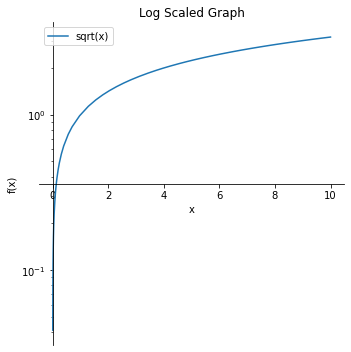

In [22]:
eqn = sqrt(x)
p = plot(eqn,title="Log Scaled Graph",size = (5,5),show=True,legend=True,yscale='log')

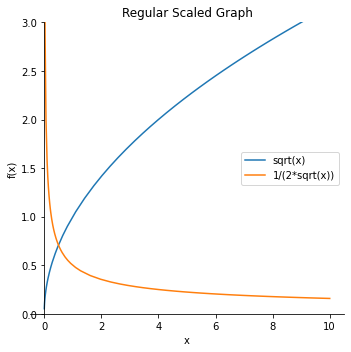

In [23]:
p = plot(eqn,diff(eqn),title="Regular Scaled Graph",size = (5,5),show=True,legend=True,ylim=(0,3))

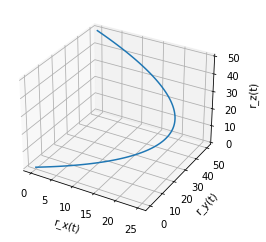

In [24]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the variable
t = sp.symbols('t')

# Define the vector components
rx = 10*t - t**2
ry = 5*t
rz = 5*t

# Convert symbolic expressions to numerical arrays
t_values = np.linspace(0, 10, 100)  # Define the range of t values
rx_values = np.array([rx.subs(t, val) - rx.subs(t, 0) for val in t_values])
ry_values = np.array([ry.subs(t, val) - ry.subs(t, 0) for val in t_values])
rz_values = np.array([rz.subs(t, val) - rz.subs(t, 0) for val in t_values])

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
ax.plot3D(rx_values, ry_values, rz_values)

# Set labels
ax.set_xlabel('r_x(t)')
ax.set_ylabel('r_y(t)')
ax.set_zlabel('r_z(t)')

# Show plot
plt.show()
